# Importing Necessary Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from Kaggle

In [58]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d prakharrathi25/banking-dataset-marketing-targets

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets
License(s): CC0-1.0
banking-dataset-marketing-targets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [59]:
!unzip '/content/banking-dataset-marketing-targets.zip'

Archive:  /content/banking-dataset-marketing-targets.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [60]:
df_train = pd.read_csv('/content/train.csv', sep =';')
df_test = pd.read_csv('/content/test.csv',sep = ';')

# Observing the Dataset

In [61]:
df_train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [62]:
df_train['train'] = 'train'
df_train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,train
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,train
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,train


In [63]:
df_test['train'] = 'test'
df_test.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,train
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,test
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,test
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,test


# Merging the Train and Test Data Together to perform Pre-Processing

In [64]:
df = pd.concat([df_train,df_test])
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,train
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,train
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,train
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,train
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,train


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
 17  train      49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 7.2+ MB


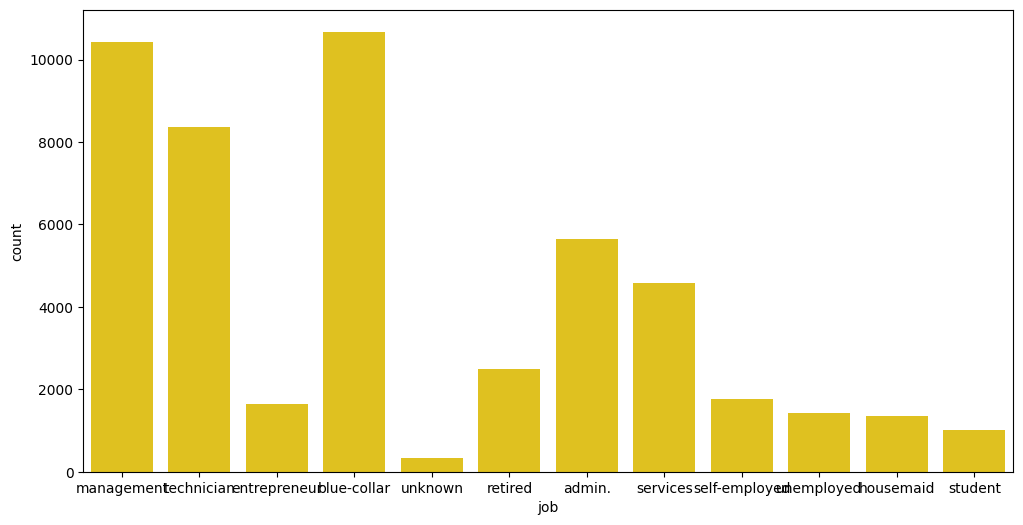

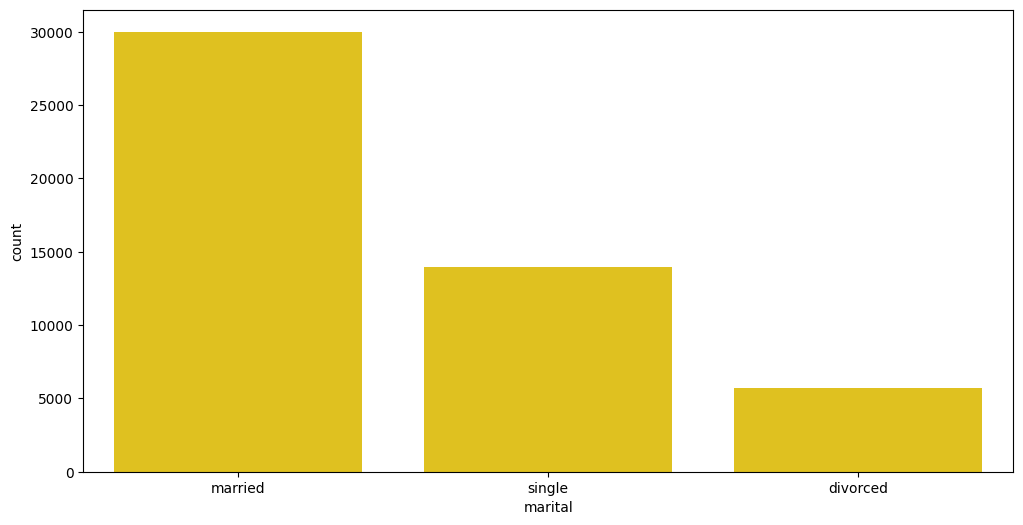

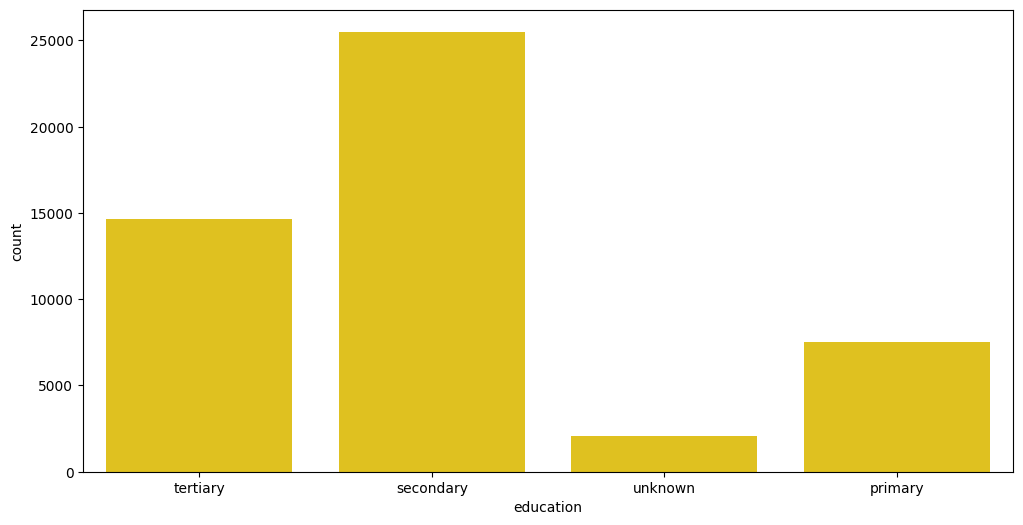

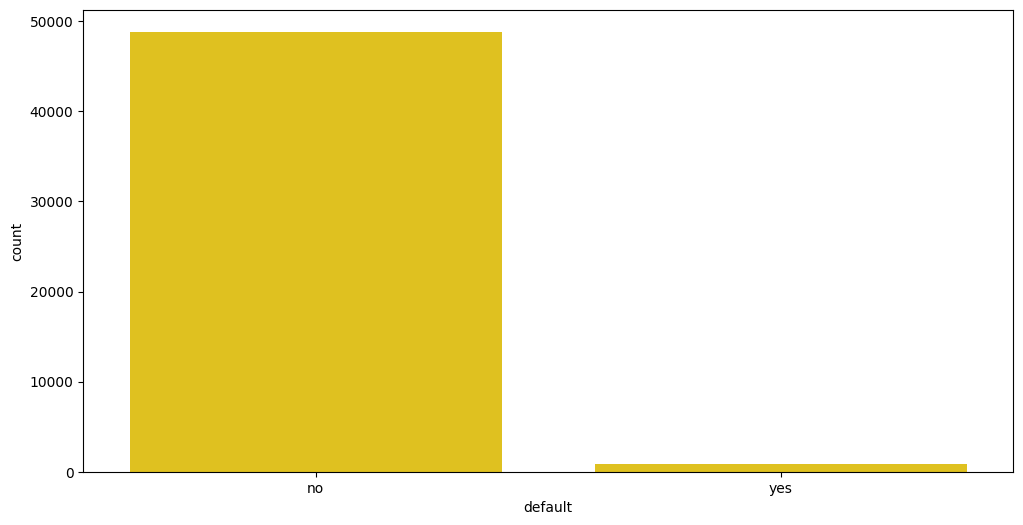

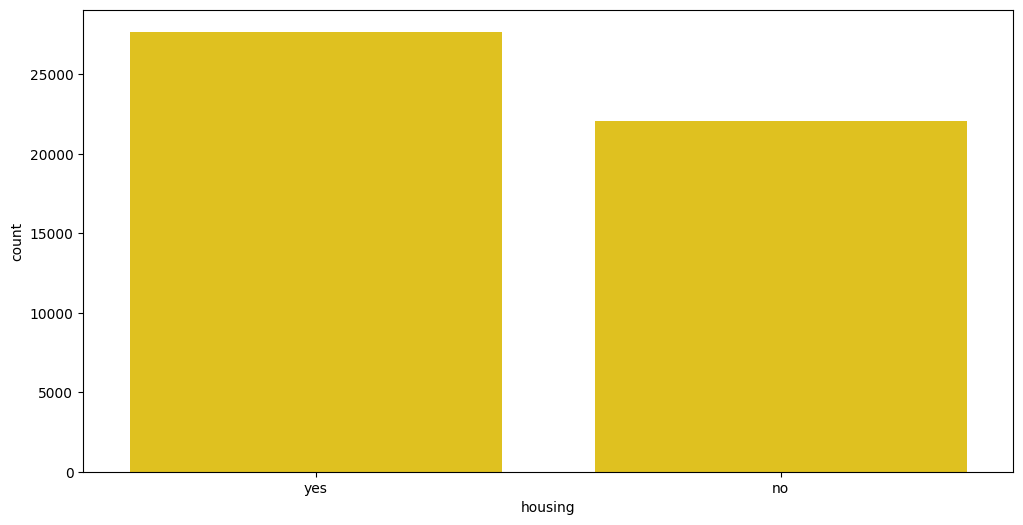

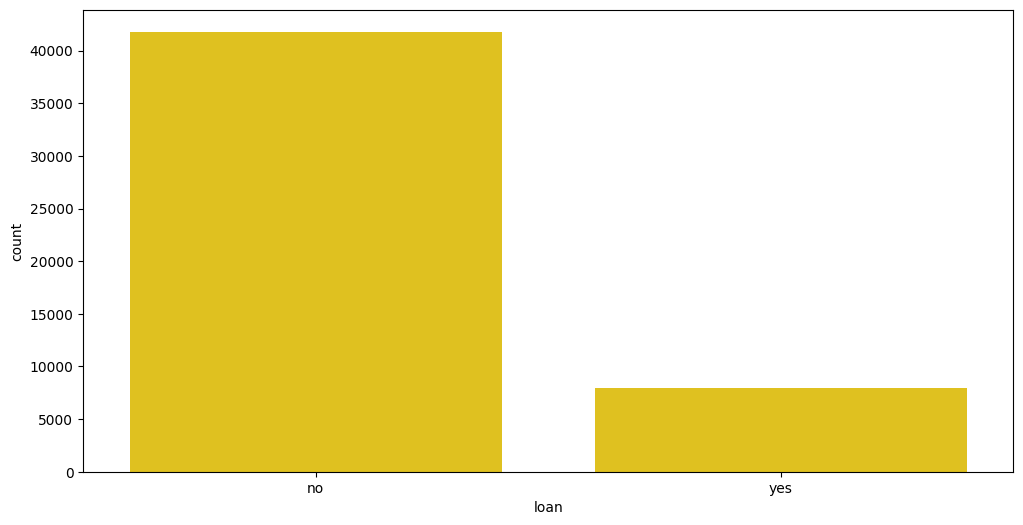

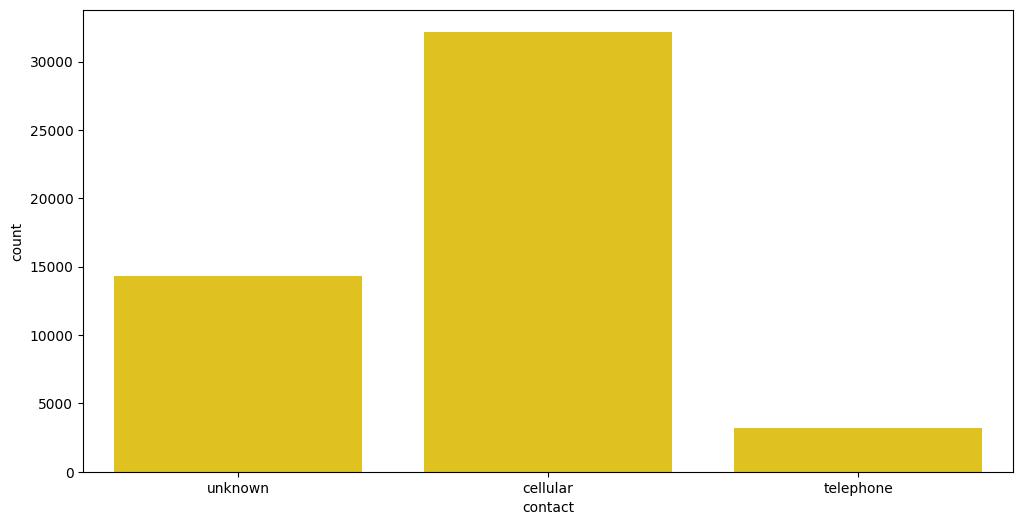

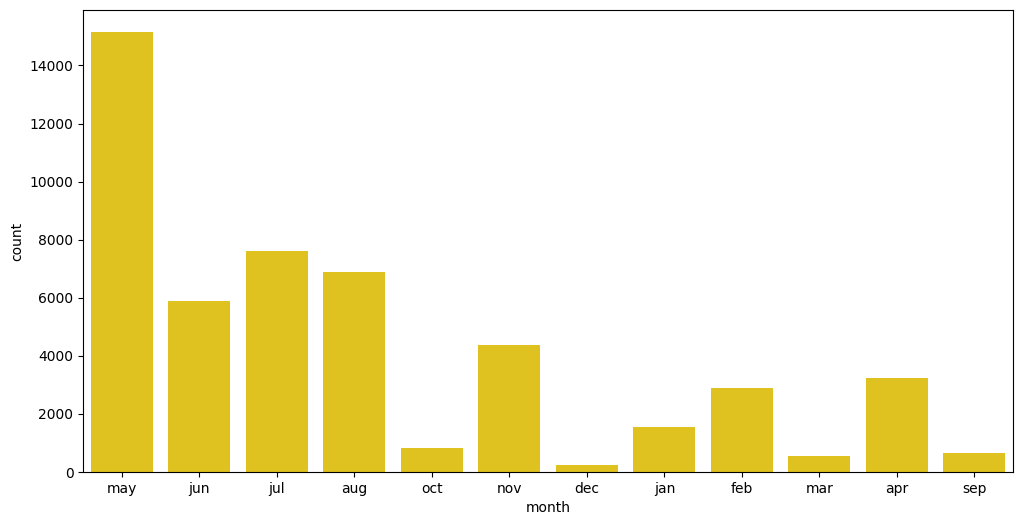

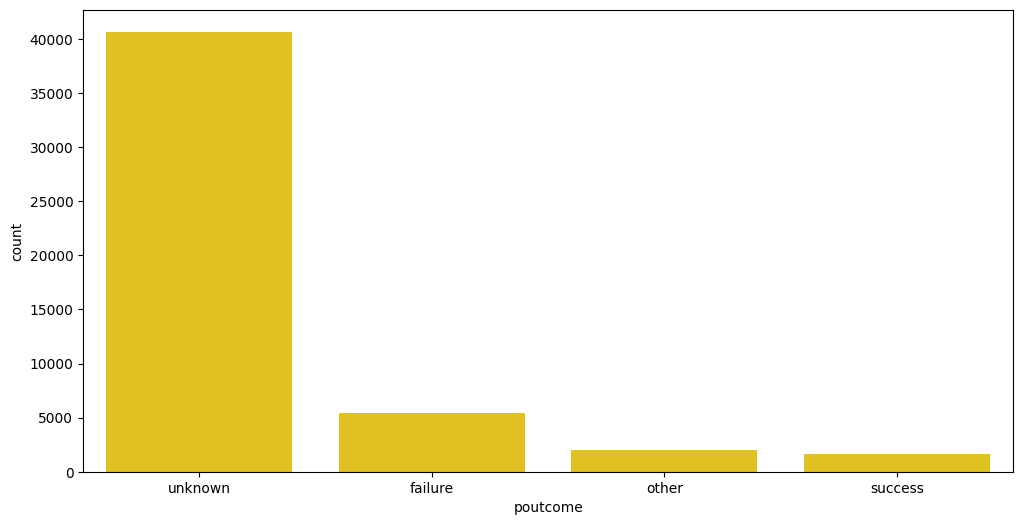

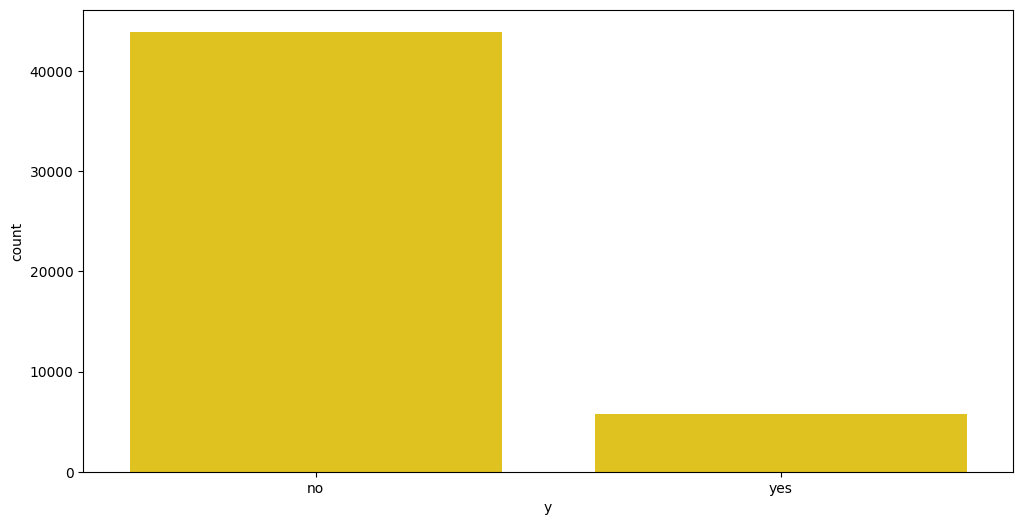

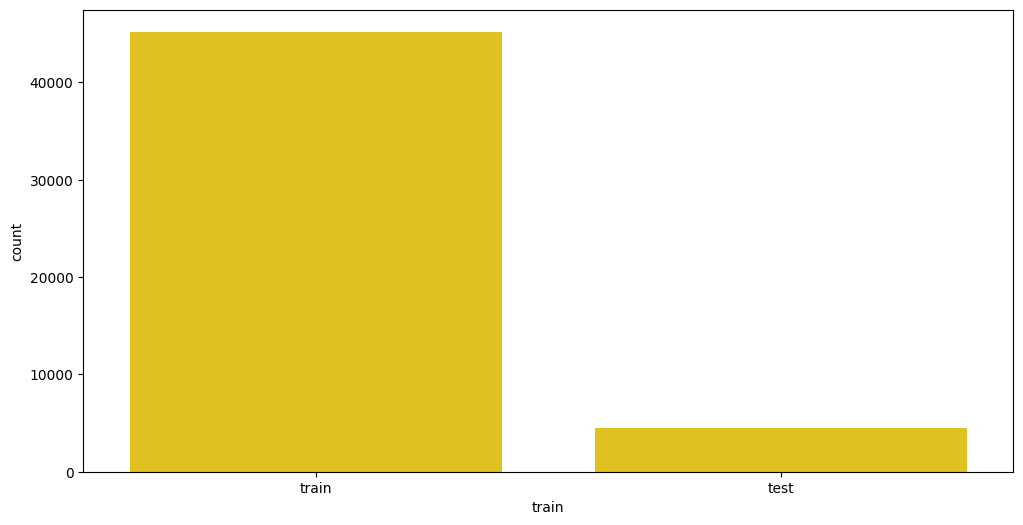

In [66]:
for i in df.select_dtypes(include ='object'):
  plt.figure(figsize=(12,6))
  sns.countplot(data= df, x = i, color = 'gold')
  plt.show()

# Performing EDA on the numerical Variables

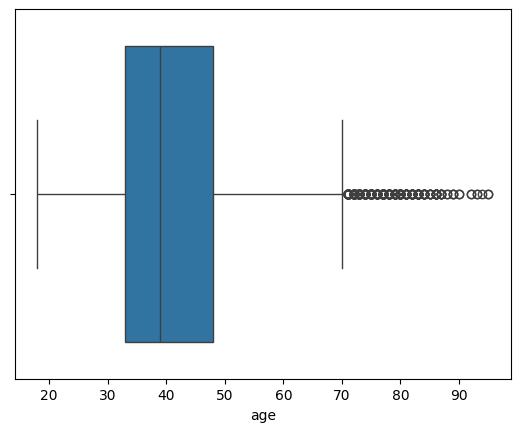

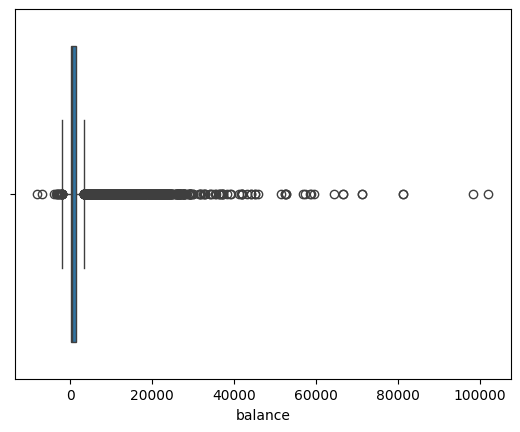

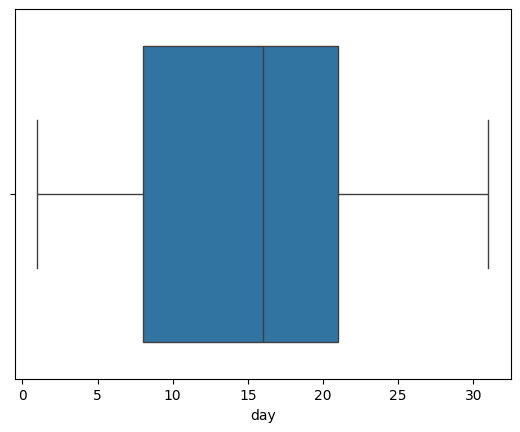

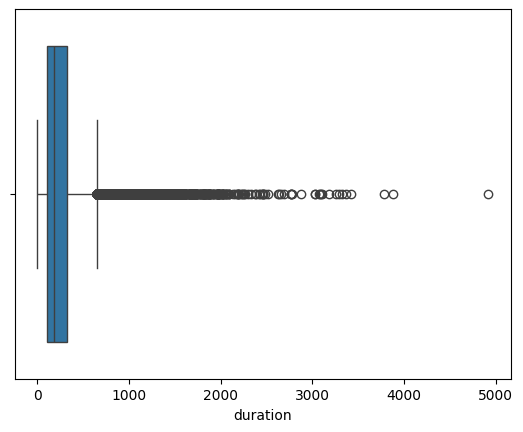

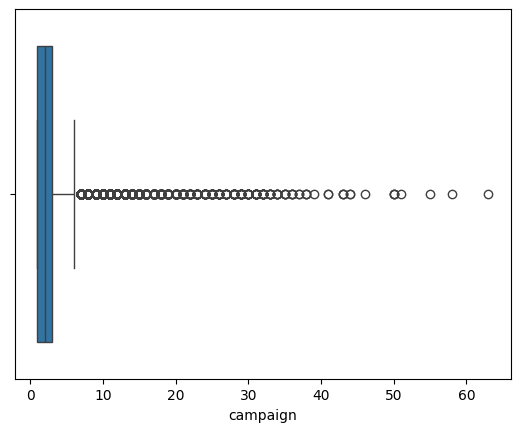

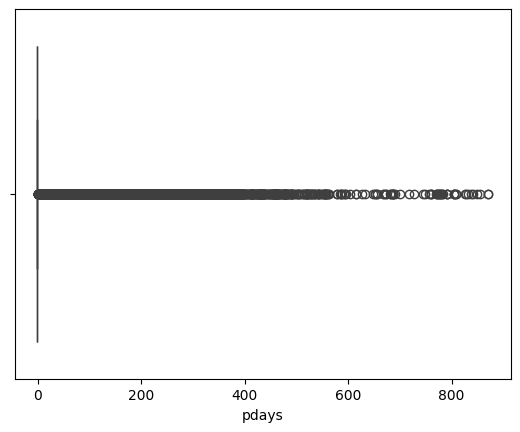

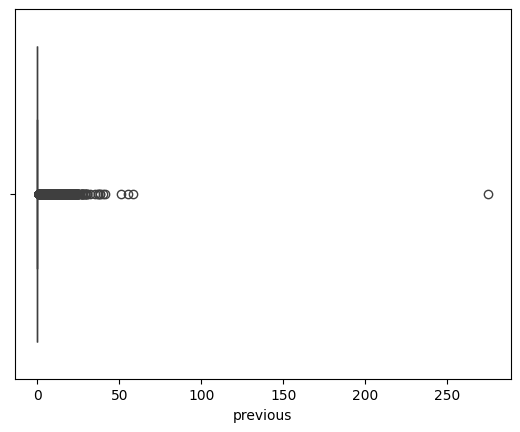

In [67]:
for i in df.select_dtypes(include =['int','float']):
  sns.boxplot(data = df, x= i)
  plt.show()

In [68]:
for i in df.select_dtypes(include =['int','float']):
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  IQR = q3-q1
  UL = q3 +1.5*IQR
  LL = q1 -1.5*IQR
  df[i] = np.where(df[i]>UL,UL,np.where(df[i]<LL,LL,df[i]))

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,train
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,train
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,train
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,train


In [71]:
cat = df.select_dtypes(include ='object')
cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y', 'train'],
      dtype='object')

In [72]:
cat.drop(columns=['train'], axis =1)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


# Encoding the categorical variables

In [73]:
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

In [74]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,train
0,58.0,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3,0,train
1,44.0,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3,0,train


# Splitting the Data into Train and Test for Validation

In [75]:
df_train = df[df['train'] == 'train']
df_test = df[df['train'] == 'test']

In [76]:
df['y'].value_counts()

,count
y,
0,43922
1,5810


In [77]:
df_train_con = df[df['y'] == 1]
df_train_ncon = df[df['y'] == 0]

# Balancing the Data set

In [78]:
df_train_con = df_train_con.sample(df_train_ncon.shape[0],replace= True)
df_train_con.shape

(43922, 18)

In [79]:
df_train = pd.concat([df_train_con,df_train_ncon])
df_train.shape

(87844, 18)

In [80]:
df_train['y'].value_counts()

,count
y,
1,43922
0,43922


In [81]:
x = df_train.drop(columns =['train','y'], axis =1)
y = df_train.y

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify =y)

# Using Tree Based Model to classify the binary classes

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_tr = dt.predict(x_train)

print('Accuracy_Test',accuracy_score(y_test,y_pred))
print('Accuracy_Train',accuracy_score(y_train,y_pred_tr))

print('**'*20)
print('Classification Report')
print(classification_report(y_test,y_pred))

print('***'*20)
print('Train Classification Report')
print(classification_report(y_train,y_pred_tr))

Accuracy_Test 0.9674426546758496
Accuracy_Train 1.0
****************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8785
           1       0.94      1.00      0.97      8784

    accuracy                           0.97     17569
   macro avg       0.97      0.97      0.97     17569
weighted avg       0.97      0.97      0.97     17569

************************************************************
Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35137
           1       1.00      1.00      1.00     35138

    accuracy                           1.00     70275
   macro avg       1.00      1.00      1.00     70275
weighted avg       1.00      1.00      1.00     70275



# Using Cross Validation to understand overfitting

In [84]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(dt,x_train,y_train,cv=5)
cv

array([0.95930274, 0.95674137, 0.95980078, 0.96001423, 0.95752401])

In [85]:
df_test.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,train
0,30.0,10,1,0,0,1787.0,0,0,0,19.0,10,79.0,1.0,-1.0,0.0,3,0,test
1,33.0,7,1,1,0,3469.5,1,1,0,11.0,8,220.0,1.0,-1.0,0.0,0,0,test


In [86]:
df_test.drop(columns =['train'], axis =1, inplace = True)

<ipython-input-86-d40c48ed57bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns =['train'], axis =1, inplace = True)


In [87]:
df_test_1 = df_test.copy()
df_test_1.drop(columns =['y'], axis =1, inplace = True)

In [88]:
final = dt.predict(df_test_1)
final

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
df_test['final'] = final
df_test.head(2)

<ipython-input-89-570e8ddf3c48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['final'] = final


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,final
0,30.0,10,1,0,0,1787.0,0,0,0,19.0,10,79.0,1.0,-1.0,0.0,3,0,0
1,33.0,7,1,1,0,3469.5,1,1,0,11.0,8,220.0,1.0,-1.0,0.0,0,0,0


# Saving and Downloading the data to check the final outout

In [108]:
data = np.round((dt.feature_importances_*100),2)

# Understanding the significant features using Feature Importance Technique

In [109]:
imp = pd.DataFrame(data ,columns =['Importance Score in %'], index= x.columns).sort_values(by='Importance Score in %',ascending=False)
imp

,Importance Score in %
duration,34.28
month,11.48
poutcome,8.61
age,8.51
balance,7.97
day,7.79
contact,6.57
housing,3.74
job,3.37
campaign,2.91


In [110]:
imp = imp.rename(index = {'duration':'Duration of Phone call','month': 'Month contacted','poutcome': 'Prev Event Outcome','age': 'Cust Age','balance': 'Cust Balance',
                 'day': 'Contacted Day','contact': 'Mode of contact','marital': 'Marital Status'})
imp

,Importance Score in %
Duration of Phone call,34.28
Month contacted,11.48
Prev Event Outcome,8.61
Cust Age,8.51
Cust Balance,7.97
Contacted Day,7.79
Mode of contact,6.57
housing,3.74
job,3.37
campaign,2.91


In [146]:
imp.drop(index=['loan','default','pdays','previous'], inplace = True)

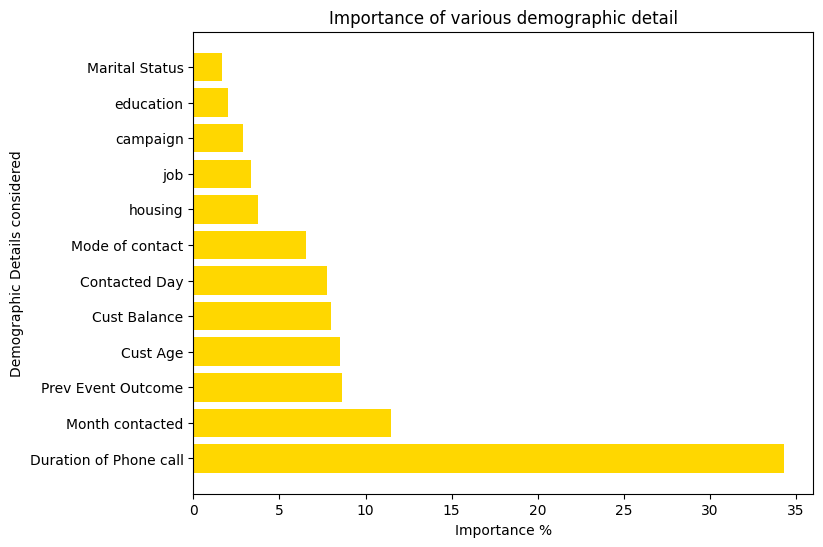

In [160]:
plt.figure(figsize = (8,6))
plt.barh(y = imp.index, width = imp['Importance Score in %'], color = 'gold')
plt.title('Importance of various demographic detail')
plt.xlabel('Importance %')
plt.ylabel('Demographic Details considered')
plt.show()